In [398]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from statsmodels.graphics.tsaplots import plot_acf
import  matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import joblib


In [399]:
df = pd.read_csv("../BTC_1_year_data_15m.csv").set_index("close_time")
df

,open,high,low,close,volume,open_time,taker_buy_base
close_time,,,,,,,
2024-12-02 12:44:59.999000+00:00,95386.14,95407.64,95080.85,95080.86,299.14374,2024-12-02 12:30:00+00:00,110.43173
2024-12-02 12:59:59.999000+00:00,95080.85,95087.98,94766.00,94972.02,352.27560,2024-12-02 12:45:00+00:00,139.92863
2024-12-02 13:14:59.999000+00:00,94972.03,95490.37,94837.77,95399.83,389.06173,2024-12-02 13:00:00+00:00,213.37077
2024-12-02 13:29:59.999000+00:00,95399.84,95743.66,95397.31,95690.65,478.14614,2024-12-02 13:15:00+00:00,272.74969
2024-12-02 13:44:59.999000+00:00,95690.64,95822.61,95567.44,95577.74,445.23818,2024-12-02 13:30:00+00:00,222.18680
...,...,...,...,...,...,...,...
2025-12-02 11:29:59.999000+00:00,87084.00,87419.99,86993.27,87419.99,239.49429,2025-12-02 11:15:00+00:00,145.59817
2025-12-02 11:44:59.999000+00:00,87419.99,87458.67,87320.01,87329.60,223.03098,2025-12-02 11:30:00+00:00,140.45822
2025-12-02 11:59:59.999000+00:00,87329.60,87602.47,87326.85,87368.92,146.36004,2025-12-02 11:45:00+00:00,93.61402


#### Feature Engineering

In [400]:
df["close_log_return"] = np.log(df["close"]/df["close"].shift())
df["volume_change"] = df["volume"].pct_change().shift()
df

,open,high,low,close,volume,open_time,taker_buy_base,close_log_return,volume_change
close_time,,,,,,,,,
2024-12-02 12:44:59.999000+00:00,95386.14,95407.64,95080.85,95080.86,299.14374,2024-12-02 12:30:00+00:00,110.43173,NaN,NaN
2024-12-02 12:59:59.999000+00:00,95080.85,95087.98,94766.00,94972.02,352.27560,2024-12-02 12:45:00+00:00,139.92863,-0.001145,NaN
2024-12-02 13:14:59.999000+00:00,94972.03,95490.37,94837.77,95399.83,389.06173,2024-12-02 13:00:00+00:00,213.37077,0.004494,0.177613
2024-12-02 13:29:59.999000+00:00,95399.84,95743.66,95397.31,95690.65,478.14614,2024-12-02 13:15:00+00:00,272.74969,0.003044,0.104424
2024-12-02 13:44:59.999000+00:00,95690.64,95822.61,95567.44,95577.74,445.23818,2024-12-02 13:30:00+00:00,222.18680,-0.001181,0.228972
...,...,...,...,...,...,...,...,...,...
2025-12-02 11:29:59.999000+00:00,87084.00,87419.99,86993.27,87419.99,239.49429,2025-12-02 11:15:00+00:00,145.59817,0.003851,-0.329264
2025-12-02 11:44:59.999000+00:00,87419.99,87458.67,87320.01,87329.60,223.03098,2025-12-02 11:30:00+00:00,140.45822,-0.001035,0.007008
2025-12-02 11:59:59.999000+00:00,87329.60,87602.47,87326.85,87368.92,146.36004,2025-12-02 11:45:00+00:00,93.61402,0.000450,-0.068742


    Create lagged features

In [401]:
df = df.copy()

In [402]:
def generate_ma_features(df, close_col="close", windows=[5, 10], shift_pct=True):
    """
    Generate moving average and pct-change-to-close features for a list of window sizes.

    Parameters
    ----------
    df : pd.DataFrame
        Input dataframe with at least a 'close' column.
    close_col : str
        Column name for the close price.
    windows : list
        List of integers for rolling windows.
    shift_pct : bool
        Whether to shift pct-change features by 1 step to avoid leakage.

    Returns
    -------
    df : pd.DataFrame
        DataFrame with new features added.
    """
    df = df.copy()

    for w in windows:
        ma_col = f"{w}ma"
        pct_col = f"pct_change_{w}ma_close"

        # Moving average
        df[ma_col] = df[close_col].rolling(w).mean()

        # Percentage difference from MA
        df[pct_col] = (df[close_col] - df[ma_col]) / df[ma_col] * 100

        # Shift to avoid leakage (optional)
        if shift_pct:
            df[pct_col] = df[pct_col].shift()

    return df


windows = [10, 50,200]

df = generate_ma_features(df, windows=windows)


In [403]:
df["close_log_return_lag_1"] = df["close_log_return"].shift()
df["close_log_return_lag_2"] = df["close_log_return"].shift(2)
df["close_log_return_lag_3"] = df["close_log_return"].shift(3)

##### Creating Microstructure Features

In [404]:
df["sell_volume"] = df["volume"] - df["taker_buy_base"]

df["buy_sell_pressure"] = (df["taker_buy_base"] - df["sell_volume"]) / df["volume"]
df["buy_sell_pressure_lag1"] = df["buy_sell_pressure"].shift(1)


In [405]:
df = df.dropna(how="any")

    Create binary classification target
        - 1=> Long => Price moves up
        - 0=> Short => Price goes down

In [406]:
df["close_log_return_dir"] = df["close_log_return"].map(lambda x:1 if x>0 else 0)
# df = df.drop(columns="close_log_return")

In [407]:
df

,open,high,low,close,volume,open_time,taker_buy_base,close_log_return,volume_change,10ma,...,pct_change_50ma_close,200ma,pct_change_200ma_close,close_log_return_lag_1,close_log_return_lag_2,close_log_return_lag_3,sell_volume,buy_sell_pressure,buy_sell_pressure_lag1,close_log_return_dir
close_time,,,,,,,,,,,,,,,,,,,,,
2024-12-04 14:44:59.999000+00:00,95780.68,96560.00,95693.05,96349.20,804.71847,2024-12-04 14:30:00+00:00,457.08398,0.005918,-0.329977,95828.210,...,-0.449413,95782.00485,0.005238,0.002851,-0.001648,-0.000026,347.63449,0.136010,0.044281,1
2024-12-04 14:59:59.999000+00:00,96349.20,96377.54,95784.26,95822.99,869.22756,2024-12-04 14:45:00+00:00,418.40142,-0.005476,1.516310,95820.033,...,0.121562,95786.25970,0.592173,0.005918,0.002851,-0.001648,450.82614,-0.037303,0.136010,0
2024-12-04 15:14:59.999000+00:00,95822.99,96386.20,95411.47,96044.01,936.07367,2024-12-04 15:00:00+00:00,506.36306,0.002304,0.080164,95835.668,...,-0.429668,95789.48060,0.038346,-0.005476,0.005918,0.002851,429.71061,0.081887,-0.037303,1
2024-12-04 15:29:59.999000+00:00,96044.01,96212.87,95807.47,96094.73,552.00969,2024-12-04 15:15:00+00:00,251.54963,0.000528,0.076903,95848.343,...,-0.209072,95791.50100,0.265717,0.002304,-0.005476,0.005918,300.46006,-0.088604,0.081887,1
2024-12-04 15:44:59.999000+00:00,96094.74,96154.52,95738.53,95928.03,839.80304,2024-12-04 15:30:00+00:00,390.85216,-0.001736,-0.410292,95850.825,...,-0.162737,95793.25245,0.316551,0.000528,0.002304,-0.005476,448.95088,-0.069181,-0.088604,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-12-02 11:29:59.999000+00:00,87084.00,87419.99,86993.27,87419.99,239.49429,2025-12-02 11:15:00+00:00,145.59817,0.003851,-0.329264,86950.001,...,0.367559,87780.97745,-0.816609,-0.002162,0.002398,0.003057,93.89612,0.215880,-0.127475,1
2025-12-02 11:44:59.999000+00:00,87419.99,87458.67,87320.01,87329.60,223.03098,2025-12-02 11:30:00+00:00,140.45822,-0.001035,0.007008,87017.394,...,0.735136,87760.53735,-0.411237,0.003851,-0.002162,0.002398,82.57276,0.259540,0.215880,0
2025-12-02 11:59:59.999000+00:00,87329.60,87602.47,87326.85,87368.92,146.36004,2025-12-02 11:45:00+00:00,93.61402,0.000450,-0.068742,87067.010,...,0.610582,87740.31660,-0.491038,-0.001035,0.003851,-0.002162,52.74602,0.279229,0.259540,1


In [408]:
df_temp = pd.DataFrame(columns=["close_log_return", "close"])
df_temp[["close_log_return", "close"]] = df[["close_log_return", "close"]]

In [409]:
def drop_ma_columns(df, windows, extra_drop=None):
    """
    Remove moving-average columns after pct-change features are created.

    Parameters
    ----------
    df : pd.DataFrame
        Input dataframe.
    windows : list
        List of MA windows used (e.g., [5,10,20]).
    extra_drop : list or None
        Additional columns to drop explicitly.

    Returns
    -------
    df : pd.DataFrame
        DataFrame with MA columns removed.
    """
    df = df.copy()

    # ma columns generated earlier
    ma_cols = [f"{w}ma" for w in windows]

    # combine with user-provided columns
    if extra_drop:
        drop_cols = list(set(ma_cols + extra_drop))
    else:
        drop_cols = ma_cols

    # drop only those that actually exist
    drop_cols = [c for c in drop_cols if c in df.columns]

    df = df.drop(columns=drop_cols, errors="ignore")

    return df


df = drop_ma_columns(
    df,
    windows,
    extra_drop=["volume", "close_log_return", "open", "high", "low", "close", 'buy_sell_pressure',"taker_buy_base","open_time"],
)

In [410]:
df

,volume_change,pct_change_10ma_close,pct_change_50ma_close,pct_change_200ma_close,close_log_return_lag_1,close_log_return_lag_2,close_log_return_lag_3,sell_volume,buy_sell_pressure_lag1,close_log_return_dir
close_time,,,,,,,,,,
2024-12-04 14:44:59.999000+00:00,-0.329977,-0.014294,-0.449413,0.005238,0.002851,-0.001648,-0.000026,347.63449,0.044281,1
2024-12-04 14:59:59.999000+00:00,1.516310,0.543671,0.121562,0.592173,0.005918,0.002851,-0.001648,450.82614,0.136010,0
2024-12-04 15:14:59.999000+00:00,0.080164,0.003086,-0.429668,0.038346,-0.005476,0.005918,0.002851,429.71061,-0.037303,1
2024-12-04 15:29:59.999000+00:00,0.076903,0.217395,-0.209072,0.265717,0.002304,-0.005476,0.005918,300.46006,0.081887,1
2024-12-04 15:44:59.999000+00:00,-0.410292,0.257059,-0.162737,0.316551,0.000528,0.002304,-0.005476,448.95088,-0.088604,0
...,...,...,...,...,...,...,...,...,...,...
2025-12-02 11:29:59.999000+00:00,-0.329264,0.263426,0.367559,-0.816609,-0.002162,0.002398,0.003057,93.89612,-0.127475,1
2025-12-02 11:44:59.999000+00:00,0.007008,0.540528,0.735136,-0.411237,0.003851,-0.002162,0.002398,82.57276,0.215880,0
2025-12-02 11:59:59.999000+00:00,-0.068742,0.358786,0.610582,-0.491038,-0.001035,0.003851,-0.002162,52.74602,0.259540,1


In [411]:
def plot_feature_scatter(df, sample_size=2000):
    """
    Creates a scatter plot matrix (pairplot) for all features in df.
    
    Parameters
    ----------
    df : pd.DataFrame
        DataFrame containing numerical features.
    sample_size : int
        Optional sampling to speed up plotting (very important for large datasets).
    """
    
    # Use only numeric columns
    numeric_df = df.select_dtypes(include=["number"]).copy()

    # Optional sampling for speed
    if len(numeric_df) > sample_size:
        numeric_df = numeric_df.sample(sample_size, random_state=42)

    sns.pairplot(numeric_df, diag_kind="kde")
    plt.show()


In [412]:
# plot_feature_scatter(df)


In [413]:
df.head()

,volume_change,pct_change_10ma_close,pct_change_50ma_close,pct_change_200ma_close,close_log_return_lag_1,close_log_return_lag_2,close_log_return_lag_3,sell_volume,buy_sell_pressure_lag1,close_log_return_dir
close_time,,,,,,,,,,
2024-12-04 14:44:59.999000+00:00,-0.329977,-0.014294,-0.449413,0.005238,0.002851,-0.001648,-0.000026,347.63449,0.044281,1
2024-12-04 14:59:59.999000+00:00,1.516310,0.543671,0.121562,0.592173,0.005918,0.002851,-0.001648,450.82614,0.136010,0
2024-12-04 15:14:59.999000+00:00,0.080164,0.003086,-0.429668,0.038346,-0.005476,0.005918,0.002851,429.71061,-0.037303,1
2024-12-04 15:29:59.999000+00:00,0.076903,0.217395,-0.209072,0.265717,0.002304,-0.005476,0.005918,300.46006,0.081887,1
2024-12-04 15:44:59.999000+00:00,-0.410292,0.257059,-0.162737,0.316551,0.000528,0.002304,-0.005476,448.95088,-0.088604,0


    Check class imbalance

In [414]:
print(df["close_log_return_dir"].value_counts())

close_log_return_dir
0    17461
1    17379
Name: count, dtype: int64


#### Split data into training and testing set but in temporal order

    Feature-Target Split

In [415]:
X = df.iloc[:,:-1 ]
y = df.iloc[:,-1]

In [416]:
test_size = 0.2

In [417]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=test_size, shuffle=False)

In [418]:
df_temp["close_log_return"]

close_time
2024-12-04 14:44:59.999000+00:00    0.005918
2024-12-04 14:59:59.999000+00:00   -0.005476
2024-12-04 15:14:59.999000+00:00    0.002304
2024-12-04 15:29:59.999000+00:00    0.000528
2024-12-04 15:44:59.999000+00:00   -0.001736
                                      ...   
2025-12-02 11:29:59.999000+00:00    0.003851
2025-12-02 11:44:59.999000+00:00   -0.001035
2025-12-02 11:59:59.999000+00:00    0.000450
2025-12-02 12:14:59.999000+00:00    0.000909
2025-12-02 12:29:59.999000+00:00   -0.000844
Name: close_log_return, Length: 34840, dtype: float64

In [419]:
def time_split(x, train_size=0.8):
    i = int(len(x) * train_size)
    return x[:i].copy(), x[i:].copy()


df_train_temp, df_test_temp = time_split(df_temp, train_size=0.8)

In [420]:
print(y_train.value_counts())
print(y_test.value_counts())

close_log_return_dir
0    13948
1    13924
Name: count, dtype: int64
close_log_return_dir
0    3513
1    3455
Name: count, dtype: int64


### Scikit-learn Logistic Regression

In [421]:
model = LogisticRegression(max_iter=200)

In [422]:
model.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


In [423]:
accuracy_score(y_train, model.predict(X_train))

0.5559342709529277

In [424]:
accuracy_score(y_test, model.predict(X_test))


0.5621412169919633

In [425]:
cm = confusion_matrix(y_test, model.predict(X_test))

<p style="color: yellow">TP, FP, TN, FN are purely relative to whatever you declare as the positive class.</p>

    - 1 is UP prediction
    - 0 is DOWN prediction
    - 1 is positive class
    - 0 is negative class



In [426]:
TN = cm[0][0]   #True Down  - When it should be down and model predicted down
FN = cm[1][0]   #False down - When it should be up but the model predicted down
FP = cm[0][1]   #False up   - When it should be down but the model predicted up
TP = cm[1][1]   #True UP    - When it should be up and the model predicted up

In [427]:
print(TN), print(TP), print(FN), print(FN)

1548
2369
1086
1086


(None, None, None, None)

#### Evaluate win rate

    Accuracy Measure

In [428]:
(TP+TN)/(TP+TN+FP+FN) 

np.float64(0.5621412169919633)

#### Evaluate the up Predictibility

In [429]:
TP/(TP+FP)

np.float64(0.5466082141209044)

#### Evaluate the up Predictibility

<p style="color: yellow; font-size: 20px">Recall</p>
    


In [430]:
TP/(TP+FN)  # Here we are essentially looking at - from all the True classes, how many True classes I predicted correctly

np.float64(0.6856729377713459)

<p style="color: yellow; font-size: 20px">Precision</p>

Precision is, for all of my predictions for a particular class, how many times I was right


In [431]:
TP/(TP+FP) # From all the times I predicted True/UP, How many were actually true/up

np.float64(0.5466082141209044)

#### Evaluate down predictability

<p style="color: yellow; font-size: 20px">Recall</p>


In [432]:
TN / (TN+FP) # Here we are essentially looking at - from all the False classes, how many false classes I predicted correctly

np.float64(0.4406490179333903)

<p style="color: yellow; font-size: 20px">Precision</p>


In [433]:
TN / (TN+FN)    # From as many times I predicted false, how many were actually false.

np.float64(0.5876993166287016)

###### **PRECISION**
###### "When I predict UP, how often am I actually right?"

```python
Precision = TP / (TP + FP)
```

**Out of all my UP predictions, how many were actually correct?**

- **Focus:** My predicted UP events (my actions)
- **Fear:** False Positives (wrongly predicting UP when it's actually DOWN)
- **High precision = When I say UP, you can trust me — but I might be missing opportunities**

---

###### **RECALL**
###### "How many actual UP moves did I successfully catch?"

```python
Recall = TP / (TP + FN)
```

**Out of all the real UP days, how many did my model correctly predict as UP?**

- **Focus:** The actual UP events (reality)
- **Fear:** False Negatives (missing UP days)
- **High recall = I catch most of the UP moves, even if I sometimes make wrong predictions**

---

###### **The Key Difference**

| | Precision | Recall |
|---|-----------|--------|
| **Perspective** | YOUR predictions | REALITY's events |
| **Denominator** | What YOU predicted | What ACTUALLY happened |
| **Question** | "Am I accurate?" | "Am I thorough?" |
| **Trading analogy** | "Hit rate of my signals" | "% of opportunities captured" |

---

###### **Trading Strategy Examples**

###### **High Precision, Low Recall Strategy**
- Very selective, only trades slam-dunk setups
- Few trades, but most are winners
- Good for: High transaction costs, limited capital, risk-averse

###### **Low Precision, High Recall Strategy**
- Casts a wide net, takes many signals
- Catches most moves, but many false alarms
- Good for: Low transaction costs, diversification, systematic execution

###### **Balanced Strategy**
- Optimizes F1-score (harmonic mean of precision and recall)
- Trades off some accuracy for better coverage
- Good for: Most real-world trading applications

---

###### **The Trade-off**

You can't maximize both simultaneously:

- ↑ Threshold → ↑ Precision, ↓ Recall (be picky)
- ↓ Threshold → ↓ Precision, ↑ Recall (be aggressive)

**The optimal balance depends on your strategy's economics.**


#### Directional Balance : Short Ratio

In [434]:
short_ratio = (FN+TN)/(FN+TN+FP+FP)
short_ratio

np.float64(0.4012797074954296)

#### Directional Balance: Long Ratio

In [435]:
long_ratio = (FP+TP)/(FN+TN+FP+FP)
long_ratio

np.float64(0.6602681291895186)

#### Directional Imbalance

In [436]:
short_ratio/long_ratio

np.float64(0.6077526534379326)

#### Evaluating Model's profitabilty (Out-of-sample)

In [437]:
df_test = X_test.copy()

In [438]:
df_test

,volume_change,pct_change_10ma_close,pct_change_50ma_close,pct_change_200ma_close,close_log_return_lag_1,close_log_return_lag_2,close_log_return_lag_3,sell_volume,buy_sell_pressure_lag1
close_time,,,,,,,,,
2025-09-20 22:44:59.999000+00:00,-0.473983,-0.019660,-0.072475,-0.312732,-0.000225,0.000059,-0.000882,30.18925,-0.175072
2025-09-20 22:59:59.999000+00:00,0.865558,-0.041855,-0.092800,-0.324886,-0.000204,-0.000225,0.000059,19.38370,-0.135347
2025-09-20 23:14:59.999000+00:00,-0.373024,-0.015223,-0.065372,-0.289285,0.000282,-0.000204,-0.000225,9.89016,-0.162684
2025-09-20 23:29:59.999000+00:00,-0.434321,-0.048855,-0.101180,-0.318958,-0.000366,0.000282,-0.000204,15.30591,-0.048716
2025-09-20 23:44:59.999000+00:00,0.596362,-0.058535,-0.110296,-0.321120,-0.000096,-0.000366,0.000282,42.08027,-0.016676
...,...,...,...,...,...,...,...,...,...
2025-12-02 11:29:59.999000+00:00,-0.329264,0.263426,0.367559,-0.816609,-0.002162,0.002398,0.003057,93.89612,-0.127475
2025-12-02 11:44:59.999000+00:00,0.007008,0.540528,0.735136,-0.411237,0.003851,-0.002162,0.002398,82.57276,0.215880
2025-12-02 11:59:59.999000+00:00,-0.068742,0.358786,0.610582,-0.491038,-0.001035,0.003851,-0.002162,52.74602,0.259540


In [439]:
model.predict(X_test)

array([1, 1, 1, ..., 0, 0, 0], shape=(6968,))

In [440]:
model.predict_proba(X_test)

array([[0.46644617, 0.53355383],
       [0.44984777, 0.55015223],
       [0.45948447, 0.54051553],
       ...,
       [0.50513457, 0.49486543],
       [0.50862226, 0.49137774],
       [0.50421297, 0.49578703]], shape=(6968, 2))

In [441]:
df_test["y_pred_binary"] = model.predict(X_test)
df_test[["close_log_return", "close"]] = df_test_temp[["close_log_return", "close"]]

In [442]:
df_test

,volume_change,pct_change_10ma_close,pct_change_50ma_close,pct_change_200ma_close,close_log_return_lag_1,close_log_return_lag_2,close_log_return_lag_3,sell_volume,buy_sell_pressure_lag1,y_pred_binary,close_log_return,close
close_time,,,,,,,,,,,,
2025-09-20 22:44:59.999000+00:00,-0.473983,-0.019660,-0.072475,-0.312732,-0.000225,0.000059,-0.000882,30.18925,-0.175072,1,-0.000204,115743.42
2025-09-20 22:59:59.999000+00:00,0.865558,-0.041855,-0.092800,-0.324886,-0.000204,-0.000225,0.000059,19.38370,-0.135347,1,0.000282,115776.06
2025-09-20 23:14:59.999000+00:00,-0.373024,-0.015223,-0.065372,-0.289285,0.000282,-0.000204,-0.000225,9.89016,-0.162684,1,-0.000366,115733.65
2025-09-20 23:29:59.999000+00:00,-0.434321,-0.048855,-0.101180,-0.318958,-0.000366,0.000282,-0.000204,15.30591,-0.048716,1,-0.000096,115722.59
2025-09-20 23:44:59.999000+00:00,0.596362,-0.058535,-0.110296,-0.321120,-0.000096,-0.000366,0.000282,42.08027,-0.016676,1,-0.000726,115638.61
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-12-02 11:29:59.999000+00:00,-0.329264,0.263426,0.367559,-0.816609,-0.002162,0.002398,0.003057,93.89612,-0.127475,1,0.003851,87419.99
2025-12-02 11:44:59.999000+00:00,0.007008,0.540528,0.735136,-0.411237,0.003851,-0.002162,0.002398,82.57276,0.215880,0,-0.001035,87329.60
2025-12-02 11:59:59.999000+00:00,-0.068742,0.358786,0.610582,-0.491038,-0.001035,0.003851,-0.002162,52.74602,0.259540,0,0.000450,87368.92


#### Add Directional Signal

In [443]:
df_test["dir_signal"] = np.where(
    df_test["y_pred_binary"] == 1, 1, -1
)  # We have just replaced the zeroes with -1
df_test[["close_log_return", "y_pred_binary", "dir_signal"]]

,close_log_return,y_pred_binary,dir_signal
close_time,,,
2025-09-20 22:44:59.999000+00:00,-0.000204,1,1
2025-09-20 22:59:59.999000+00:00,0.000282,1,1
2025-09-20 23:14:59.999000+00:00,-0.000366,1,1
2025-09-20 23:29:59.999000+00:00,-0.000096,1,1
2025-09-20 23:44:59.999000+00:00,-0.000726,1,1
...,...,...,...
2025-12-02 11:29:59.999000+00:00,0.003851,1,1
2025-12-02 11:44:59.999000+00:00,-0.001035,0,-1
2025-12-02 11:59:59.999000+00:00,0.000450,0,-1


#### Add trade log return

In [444]:
df_test["trade_log_return"] = df_test["dir_signal"] * df_test["close_log_return"]
df_test[
    [
        "close_log_return",
        "y_pred_binary",
        "dir_signal",
        "trade_log_return",
    ]
]

,close_log_return,y_pred_binary,dir_signal,trade_log_return
close_time,,,,
2025-09-20 22:44:59.999000+00:00,-0.000204,1,1,-0.000204
2025-09-20 22:59:59.999000+00:00,0.000282,1,1,0.000282
2025-09-20 23:14:59.999000+00:00,-0.000366,1,1,-0.000366
2025-09-20 23:29:59.999000+00:00,-0.000096,1,1,-0.000096
2025-09-20 23:44:59.999000+00:00,-0.000726,1,1,-0.000726
...,...,...,...,...
2025-12-02 11:29:59.999000+00:00,0.003851,1,1,0.003851
2025-12-02 11:44:59.999000+00:00,-0.001035,0,-1,0.001035
2025-12-02 11:59:59.999000+00:00,0.000450,0,-1,-0.000450


#### Compound growth returns (Log returns are time additive)

In [445]:
df_test["cum_trade_log_return"] = df_test["trade_log_return"].cumsum()

<Axes: xlabel='close_time'>

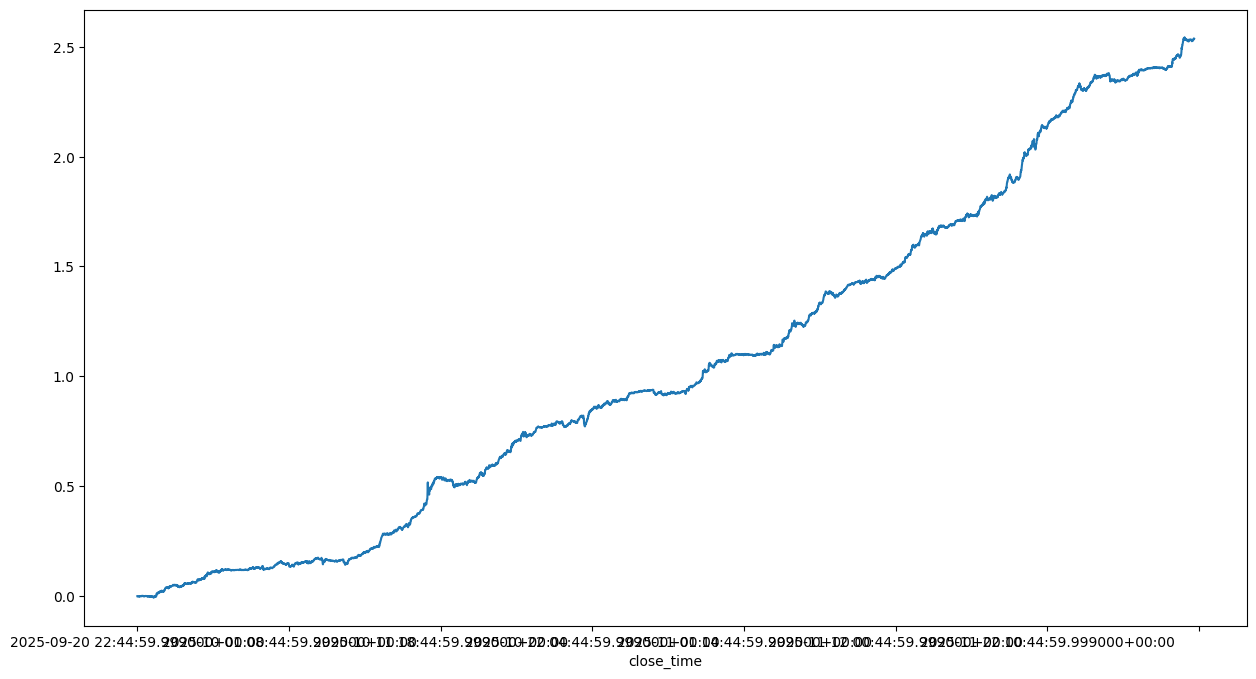

In [446]:
df_test["cum_trade_log_return"].plot(figsize=(15, 8))

<Axes: xlabel='close_time'>

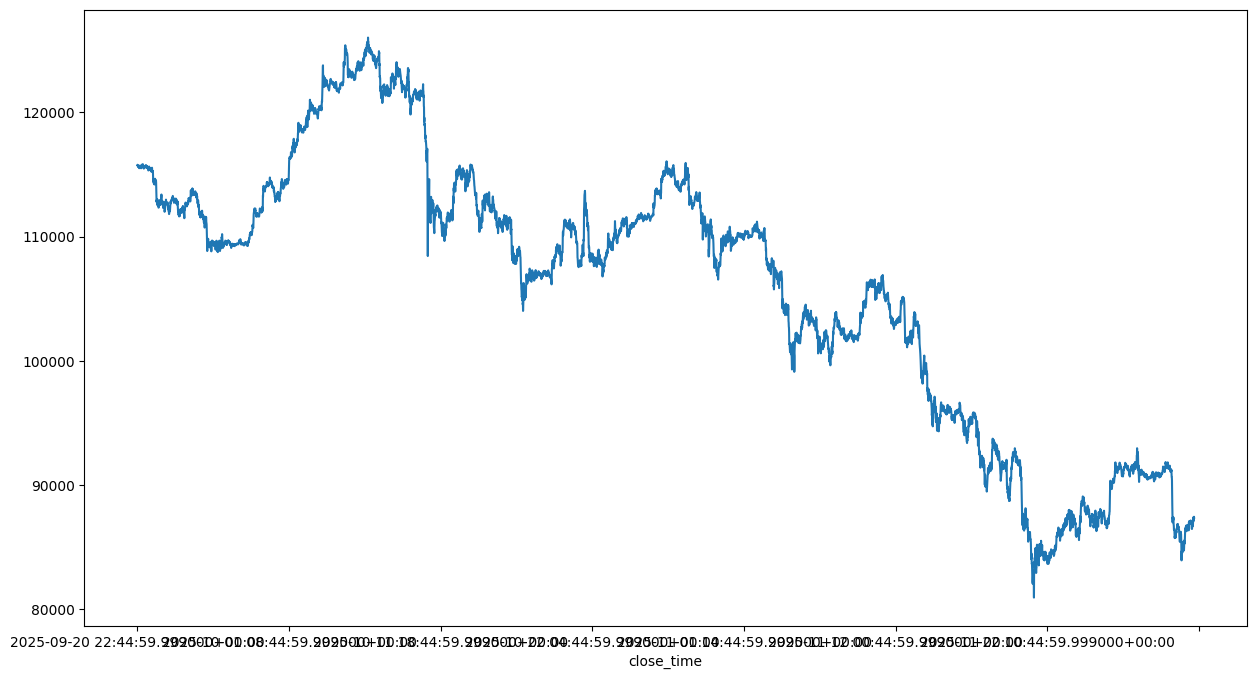

In [447]:
df_test["close"].plot(figsize=(15, 8))

#### Display Equity curve

In [448]:
intial_capital = 100

<Axes: xlabel='close_time'>

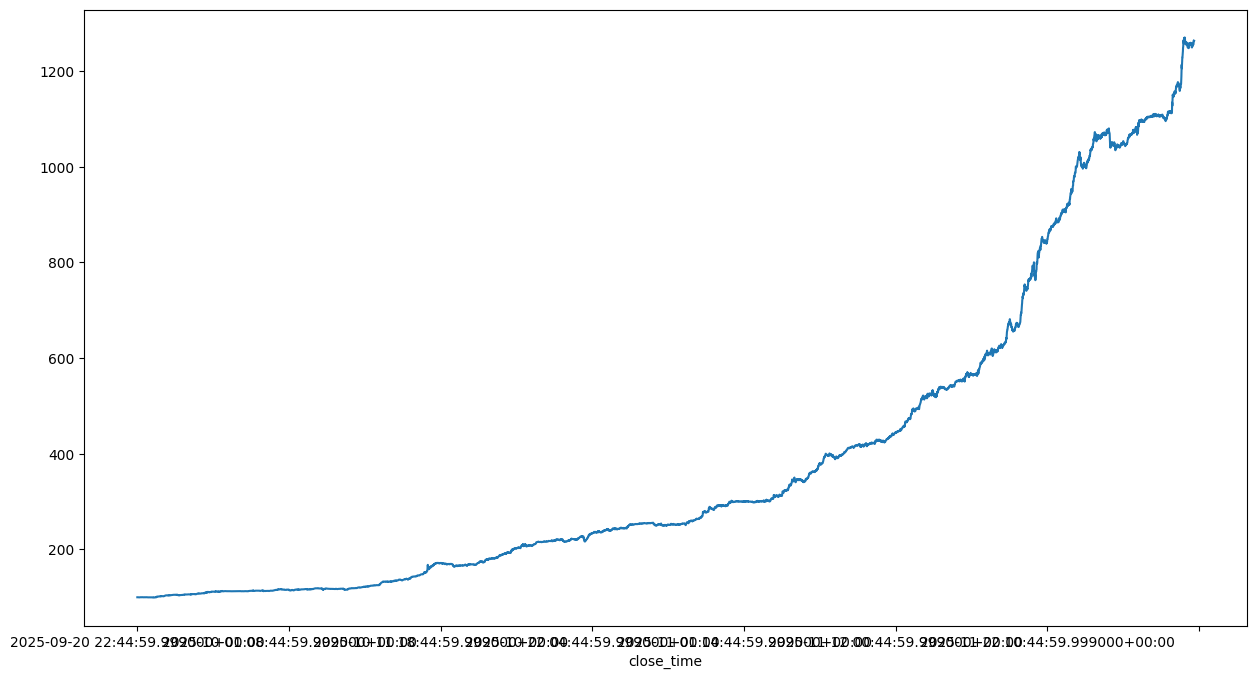

In [449]:
df_test["trade_gross_pnl"] = np.exp(df_test["cum_trade_log_return"]) * intial_capital
df_test["trade_gross_pnl"].plot(figsize=(15, 8))

#### Evaluate total compound return

In [450]:
total_compound_return = np.exp(df_test["trade_log_return"].sum())
total_compound_return

np.float64(12.632720806680402)

#### Evaluate Gross PnL

In [451]:
total_compound_return * intial_capital

np.float64(1263.2720806680402)